# Food Delivery Cost and Profitability Analysis

In [50]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
food_orders = pd.read_csv("food_orders_new_delhi.csv")

In [4]:
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [5]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [7]:
# convert date and time columns to datetime
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

In [8]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

Order Date and Time and Delivery Date and Time columns have been converted to datetime format.

In [9]:
# first, let's create a function to extract numeric values from the 'Discounts and Offers' string
def extract_discount(discount_str):
    if 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])
    else:
        # No discount
        return 0.0

In [10]:
# apply the function to create a new 'Discount Value' column
food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))

In [11]:
# for percentage discounts, calculate the discount amount based on the order value
food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

In [12]:
# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
food_orders['Discount Amount'] = food_orders.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

In [14]:
#print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), food_orders.dtypes)
print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']])

     Order Value Discounts and Offers  Discount Percentage  Discount Amount
0           1914            5% on App                  5.0            95.70
1            986                  10%                 10.0            98.60
2            937         15% New User                 15.0           140.55
3           1463                 None                  0.0             0.00
4           1992         50 off Promo                 50.0           996.00
..           ...                  ...                  ...              ...
995          825            5% on App                  5.0            41.25
996         1627                 None                  0.0             0.00
997          553                 None                  0.0             0.00
998         1414         15% New User                 15.0           212.10
999         1657         15% New User                 15.0           248.55

[1000 rows x 4 columns]


In [16]:
food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head()

,Order Value,Discounts and Offers,Discount Percentage,Discount Amount
0,1914,5% on App,5.0,95.70
1,986,10%,10.0,98.60
2,937,15% New User,15.0,140.55
3,1463,None,0.0,0.00
4,1992,50 off Promo,50.0,996.00


Discount Percentage has been added to represent the discount rate or fixed amount discount directly.

In [17]:
food_orders.dtypes

Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount                  float64
dtype: object

# Cost and Profitability Analysis

In [18]:
# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

# aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()


In [20]:
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0,0.0,0.00,77.00,146,69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00,1076.00,130,-946.00


In [21]:
overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}


Total Orders: 1,000
Total Revenue (from Commission Fees): 126,990 INR
Total Costs: 232,709.85 INR (including delivery fees, payment processing fees, and discounts)
Total Profit: -105,719.85 INR

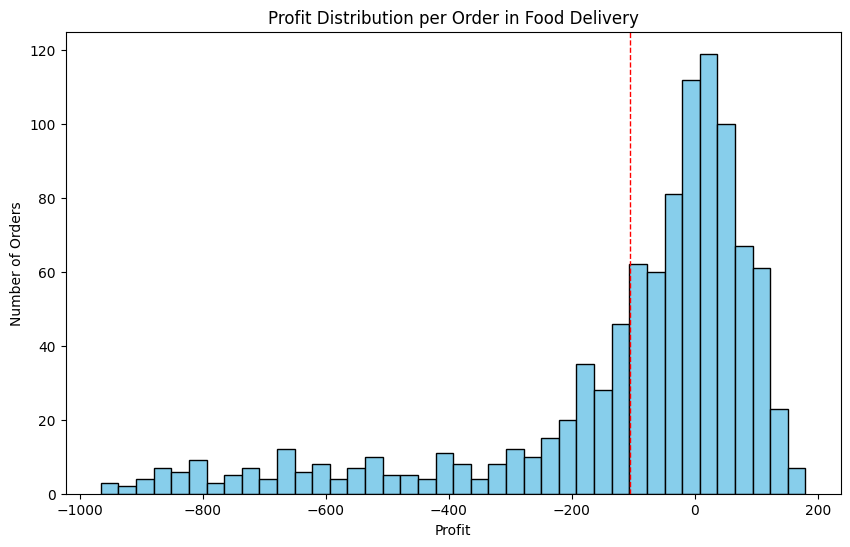

In [25]:
# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(food_orders['Profit'], bins=40, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (profits below 0). The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

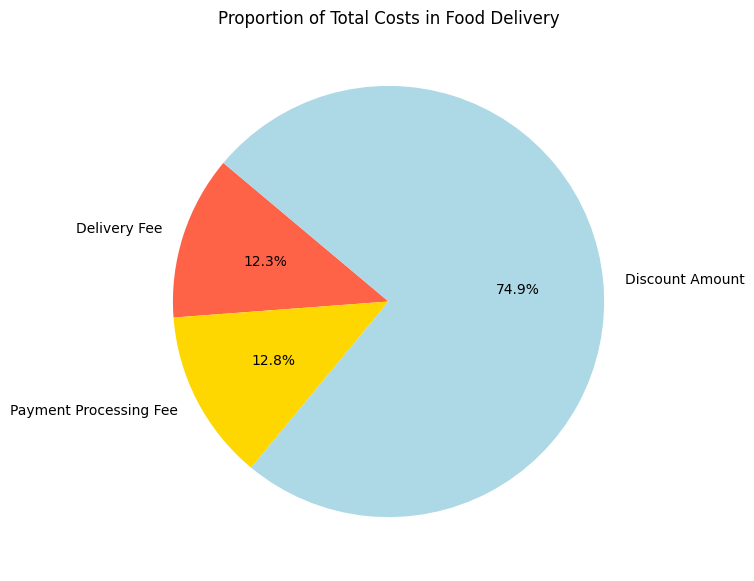

In [26]:
# pie chart for the proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

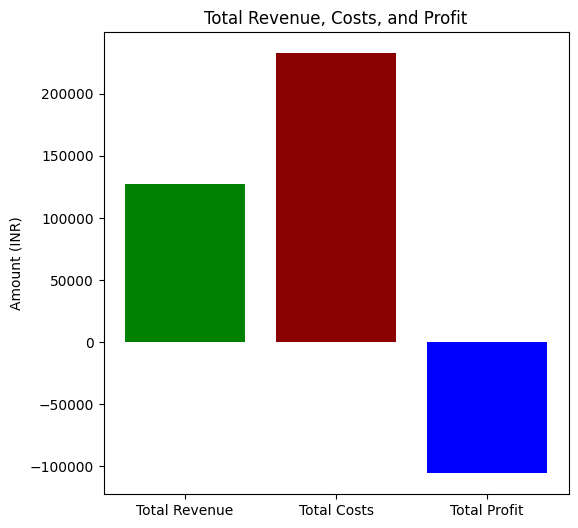

In [29]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(6, 6))
plt.bar(totals, values, color=['green', 'darkred', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

The bar chart compares total revenue, total costs, and total profit. It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.

In [49]:
# filter the dataset for profitable orders
profitable_orders = food_orders[food_orders['Profit'] > 0]

In [47]:
# filter the dataset for profitable orders
#profitable_orders = food_orders[food_orders['Profit'] > 0]
# calculate the average commission percentage for profitable orders
#profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
#profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

30.508436145149435 5.867469879518072


In [48]:
profitable_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit,Commission Percentage,Effective Discount Percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30,7.836991,5.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40,20.081136,10.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0,0.0,0.00,77.00,146,69.00,9.979494,0.0
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10,20.956720,10.0
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85,47.524752,5.0


New Average Commission Percentage: 30.51% and
New Average Discount Percentage: 5.87%

In [51]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee'] +
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])

In [52]:
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,...,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit,Simulated Commission Fee,Simulated Discount Amount,Simulated Total Costs,Simulated Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,...,0,5.0,95.70,142.70,150,7.30,574.2,114.84,161.84,412.36
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,...,0,10.0,98.60,161.60,198,36.40,295.8,59.16,122.16,173.64
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,...,0,15.0,140.55,215.55,195,-20.55,281.1,56.22,131.22,149.88
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,...,0,0.0,0.00,77.00,146,69.00,438.9,87.78,164.78,274.12
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,...,0,50.0,996.00,1076.00,130,-946.00,597.6,119.52,199.52,398.08


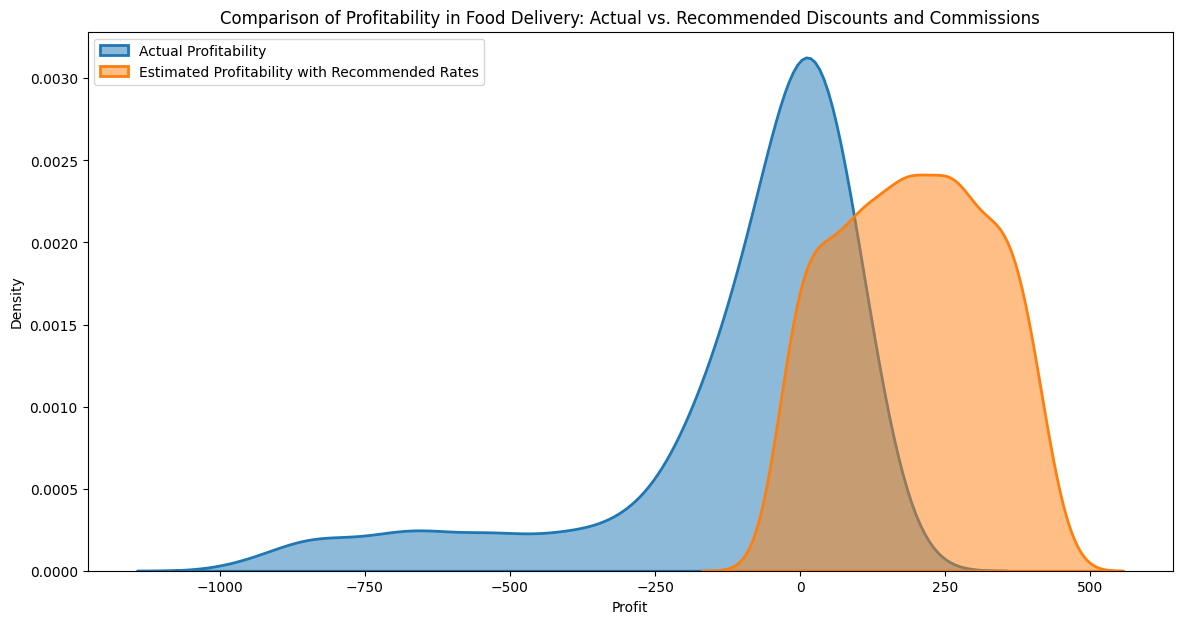

In [53]:
# visualizing the comparison
plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

The visualization compares the distribution of profitability per order using actual discounts and commissions versus the simulated scenario with recommended discounts (6%) and commissions (30%).

Summary
Analyze the cost and profitability of a food delivery company. Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.